<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Константин!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Како правило, во вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:


Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [ ]:
#выгружаем в датафрейм pandas необходимые данные
from phik import phik_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sb
db_config = {'user': 
             'pwd': 
             'host': 
             'port': 
             'db': 
             }
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)
engine = create_engine(connection_string)

query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT
    -- данные о заказе
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    (
      p.created_dt_msk::date
      - LAG(p.created_dt_msk::date) OVER (
          PARTITION BY p.user_id
          ORDER BY p.created_dt_msk::date
        )
    ) AS days_since_prev,

    -- данные о мероприятии и месте проведения
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,
    r.region_name,
    c.city_name
FROM afisha.purchases AS p
INNER JOIN afisha.events  AS e ON e.event_id = p.event_id
INNER JOIN afisha.city    AS c ON c.city_id = e.city_id
INNER JOIN afisha.regions AS r ON r.region_id = c.region_id
WHERE p.device_type_canonical IN ('mobile', 'desktop')
  AND e.event_type_main != 'фильм'
ORDER BY p.user_id;
'''
df = pd.read_sql_query(query, con=engine)

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>

* Сейчас тетрадка пришла невыполненная.
    
    
* Все необходимые библиотеки лучше подгружать сразу в начале проекта, это соответствует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта. 
    
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует сначала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно структурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Так удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

    
</div>
    
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Импортирование библиотек и загрузка данных - это все-таки разные этапы, поэтому для лучшей структурности лучше разделить их на отдельные разделы.
    
    
* Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. 
    
    Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

    ```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
    В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
    ```python
import os
import dotenv 
load_dotenv() # автоматически ищет .env в текущей директории
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```

    Также данный файл можно добавить в репозиторий и здесь на платформе. Для этого нужно нажать на лого jupyter hub, найти кнопку для создания нового файла, внести необходимое содержимое, переименовать файл нужным образом и сохранить.
    
</div>

In [2]:
#выводим первые 10 строк датафрейма для ознакомления
display(df.head(10))

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,9cc55c15-4375-4129-9979-3129688ba1b4,концерты,Облачко,Лугоградская область,Кристалевск
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,2f98d69f-4e60-4ffc-8f16-e539383526b1,театр,Край билетов,Каменевский регион,Глиногорск
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,0d876e01-851e-458b-ba61-753e0e0c4063,театр,Лучшие билеты,Поленовский край,Дальнозолотск
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,театр,Лучшие билеты,Поленовский край,Дальнозолотск
9,000cf0659a9f40f,mobile,6818017,2024-06-20,2024-06-20 10:35:26,rub,1421.91,4,NaN,516728,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерты,Лови билет!,Широковская область,Радужнополье


---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [3]:
#изучим общую информацию о данных и ее корректность
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

None

выгружены данные. Кол-во строк составляет - 290611, все значения в датафрейме - ненулевые, пропуски присутствуют только в столбце days_since_prev

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>
    

* `print` используется для простого текстового вывода. Но в средах с поддержкой rich output (Jupyter, IPython) также доступен `display`. Для объектов, где важно сохранить форматирование или визуализацию (DataFrame, картинки, графики, HTML и т.д.) лучше использовать его.
    
    
* На основе чего сделан выводы о ненулевых значениях?
    
    
* Стоит предположить, что пропуски, скорее всего, образовались на первых заказах пользователей, в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней.

    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было бы отметить, что нам потребуется привести выручку к единой валюте, убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить объем занимаемой памяти.
    
</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [4]:
#приведем данные к нужным типам и добавим расчет выручки в рублях
rate = pd.read_csv("https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv")
rate["data"] = pd.to_datetime(rate["data"]).dt.date
rate["cdx"] = rate["cdx"].str.lower()

df["order_dt"] = pd.to_datetime(df["order_dt"]).dt.date
df["currency_code"] = df["currency_code"].str.lower()

df = df.merge(
    rate[["data", "cdx", "curs"]],
    how="left",
    left_on=["order_dt", "currency_code"],
    right_on=["data", "cdx"]
)

df["revenue_rub"] = df["revenue"].where(
    df["currency_code"].ne("kzt"),
    df["revenue"] * df["curs"] / 100
)

# добавил проверку
print("RUB changed:", (df.loc[df["currency_code"].eq("rub"), "revenue"]
                       != df.loc[df["currency_code"].eq("rub"), "revenue_rub"]).sum())
print("KZT NaN in revenue_rub:", df.loc[df["currency_code"].eq("kzt"), "revenue_rub"].isna().sum())

df = df.drop(columns=["data", "cdx", "curs"])
print(df.columns)
display(df.head())

RUB changed: 0
KZT NaN in revenue_rub: 0
Index(['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
       'currency_code', 'revenue', 'tickets_count', 'days_since_prev',
       'event_id', 'event_name', 'event_type_main', 'service_name',
       'region_name', 'city_name', 'revenue_rub'],
      dtype='object')


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк,1390.41


провели расчет выручки из казахстанских тенге в российские рубли

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Обрати внимание, что ты сейчас присоединяшь курс и наименование валюты к каждой строке основной таблицы, а затем при проверке условия задействуешь наименование курса из присоединенной таблицы. В итоге у тебя сейчас конвертивровались абсолютно все значения, в том числе исходно рублевые.

</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.


* Условный метод реализован и в pandas - [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* После проведения каких-либо манипуляций с данными необходимо убеждаться, что все выполнилось корректно. Для проверки результата стоит вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом проверить оба кейса, и когда корректировка требовалась, и когда нет, убедиться, что не образовалось пропусков.
    
 
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем, достигли ли нужного нам результата.
    
   
* Напоминаю про моменты, поясненные ранее: отображение таблиц.

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Поправил расчет выручки в тенге в соответствии с комментариями

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [5]:
#проверка столбцов на пропуски
display(df.isna().sum())

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
region_name                  0
city_name                    0
revenue_rub                  0
dtype: int64

Пропуски пристутствуют только в столбце "days_since_prev", что соответсвует норме по условию задачи

In [6]:
#преобразуем типы данных в числовых столбцах
df[['order_id', 'tickets_count', 'event_id']] = df[['order_id', 'tickets_count', 'event_id']].astype('int8')
df[['revenue', 'days_since_prev']] = df[['revenue', 'days_since_prev']].astype('float16')

c:\Users\79017\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [7]:
#проверка на дубликаты
display(df.duplicated().sum())

0

Дубликатов не выявлено

In [8]:
#проверим распредление данных и наличие в них выбросов для номинальных признаков
df[['device_type_canonical', 'event_type_main', 'region_name', 'tickets_count']].info()
df[['tickets_count', 'device_type_canonical', 'event_type_main', 'region_name']].describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   device_type_canonical  290611 non-null  object
 1   event_type_main        290611 non-null  object
 2   region_name            290611 non-null  object
 3   tickets_count          290611 non-null  int8  
dtypes: int8(1), object(3)
memory usage: 6.9+ MB


,tickets_count,device_type_canonical,event_type_main,region_name
count,290611.000000,290611,290611,290611
unique,NaN,2,7,81
top,NaN,mobile,концерты,Каменевский регион
freq,NaN,232490,115276,91058
mean,2.754311,NaN,NaN,NaN
std,1.170620,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN
75%,4.000000,NaN,NaN,NaN


In [9]:
print(df.shape[0])
#количество строк, где в столбце revenue_rub отрицательное значение
neg_count = (df['revenue_rub'] < 0).sum()
print(neg_count)
#доля строк, где revenue_rub отрицательное
neg_share = neg_count / len(df) * 100
print(neg_share)
#удалим строки с отрицательным revenue_rub 
df = df[df['revenue_rub'] >= 0]
print(df.shape[0])

290611
381
0.13110308969722412
290230


Колво отрицательных значений в относительном выражении для выручки несущественно, удалили их

count    287405.000000
mean        518.719256
std         511.951842
min           0.000000
25%         112.600000
50%         344.830000
75%         788.900000
max        2628.421739
Name: revenue_rub, dtype: float64

count    287405.000000
mean          2.741323
std           1.163087
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

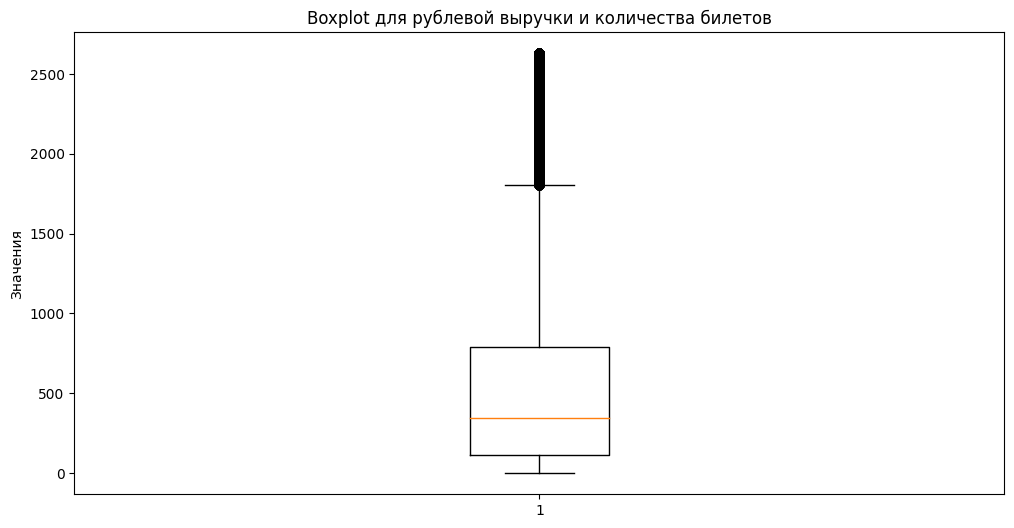

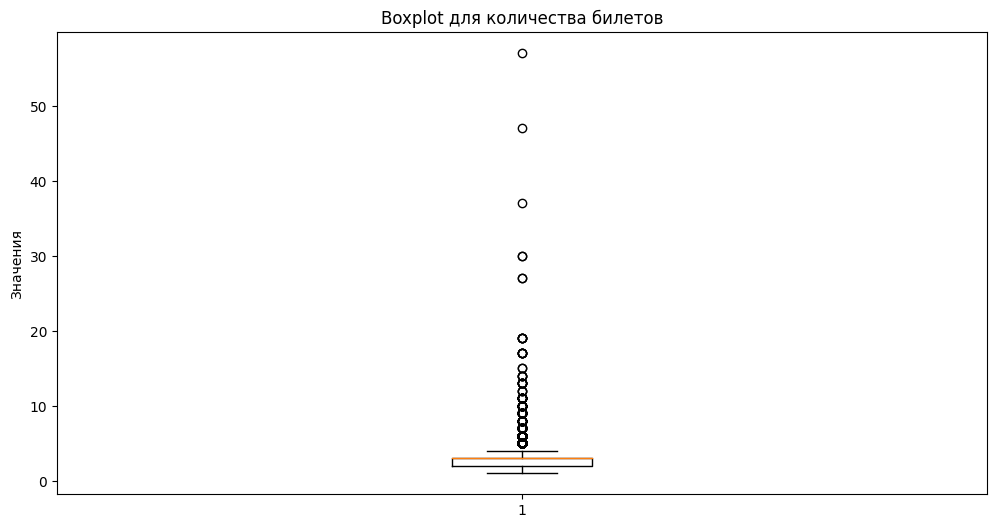

In [10]:
#визуализируем распределения для столбцов через boxplot
p99 = df["revenue_rub"].quantile(0.99)
df = df[df["revenue_rub"] <= p99]
display(df['revenue_rub'].describe())
display(df['tickets_count'].describe())

plt.figure(figsize=(12, 6))
plt.boxplot(df['revenue_rub'])
plt.title('Boxplot для рублевой выручки и количества билетов')
plt.ylabel('Значения')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(df['tickets_count'])
plt.title('Boxplot для количества билетов')
plt.ylabel('Значения')
plt.show()

провели анализ распредления в ключевых столбцах через боксплот для наглядной демонстрации распредления значений и выбросов. Обе категории имеют высокую выраженность выбросов, правую ассиметрию, высокие показатели стандартного отклонения в процентном измерении. Фильтрация по 99 перцентилю позволила избавиться от значений выбросов, что сильно упростило статистический аналз. В столбце 'revenue_rub' избавились от отрицательных значений, это упростит дальнейший статистический анализ. 

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b>
    
    
* Решение по пропускам не пояснено, почему оставляем, как есть? Было бы не лишним убедиться, что пропуски имеются только в количестве дней между заказами у первых заказов пользователей, то есть что проблемы здесь нет, это как раз и будет обоснованием.


* Не уделено внимание номинальным признакам, не требуется ли там нормализация? Нет ли неявных дубликатов? При проверке на неявные дубликаты стоит проверять самые редкие значения. Если они странно выглядят, отличаются от основного формата записи, значит дубликаты имеются, нужно изучить вопрос более подробно.
    
    
* Выручка и количество билетов имеют кардинально разный порядок значений, их не следует помещать на график с общей осью.
    
    
* Стоит также обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.
    
    
* После завершения предобработки необходимо зафиксировать итоговые выводы - кратко, что было проделано и какие решения приняты, сколько данных мы потеряли и сколько пойдет в дальнейший анализ, достаточно ли это. Потери и остаток лучше рассчитывать динамически, чтобы они автоматически подстраивались под корректировки выше по коду.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации 💡:</b> 

* Дубликаты могут быть в том числе и неполные, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времени, за которое человек не успел бы вручную произвести еще одну покупку. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их наличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.


* Снизить размерность типа для количественных показателей имеет смысл уже после проведения предобработки. Для смены числовых типов лучше использовать [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) с настройкой `downcast`, чтобы минимальная возможная точность определялась автоматически, и мы случайно бы не стерли вариативность (для количества дней только заранее нужно перевести в `Int`, который, в отличие от `int`, дозволяет присутствие пропусков, а уже потом даункастить).
    
    
* Также, если признак состоит из повторяющихся категорий (в этом нужно убедиться), то ему можно назначить тип `category`.

    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике. Для лучшего ориентирования внутри графика стоит добавить сетку.


* При принятии решения относительно выбросов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему принято именно такое решение по работе с выбросами.


* Для лучшей навигации по проекту было бы неплохо создать четкую последовательность действий, выделить тематические подразделы.


* Если выводим какие-то значения на печать, в том числе стоит печатать, что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять, а также форматировать сами значения. Для красоты и удобства дробные значения лучше округлять до знаков, которые могут представлять для нас интерес.

    
* Напоминаю про моменты, поясненные ранее: последовательный сторителлинг.

</div>


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
разбил выручку и колво билетов по разным боксплотам.
исключил отрицательные значения в выручке, проверив какой процент данных потеряем
Пропуски пристутствуют только в столбце "days_since_prev", что соответсвует норме по условию задачи
Дубликатов не выявлено
Все аномальные номинальные значения проверены, Редкие значения выявлены только в столбцах event_id, order_id и revenue_rub. Доп проверка показала что значения event_id, order_id -- норма, просто отрицательный код для идентификации, на дальнейшую работу не влияет
Выявлены отрицательные значения по рублевой выручке, их доля составила около 1 процента, удалим их

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b>
    
    
* Под номинальными данными подразумеваются не `id`, а текстовые наименования устройства, мероприятия, билетного оператора и региона. Дальше мы их задействуем в анализе, поэтому важно убедиться, что они приведены в порядок.

    
* Не хватает фиксирования итогвых потерь и остатка по итогу всей предобработки.
    
</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Проверил номинальные признаки: аномалий нет. Дополнительно просмотрел каждый столбец через Data Wrangler. Колво указанных строк указано в выводе ячейки, где убрали отрицательную рублевую выручку. Колво - 381, 1,3% всех данных

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [11]:
df1 = (df
            .sort_values(by='order_ts')
            .groupby('user_id')
            .agg(
                first_order=('order_dt','min'),
                last_order=('order_dt','max'),
                first_device=('device_type_canonical','first'),
                first_region=('region_name','first'),
                first_ticket_operator=('service_name','first'),
                first_event_type=('event_type_main','first'),
                total_orders=('order_id','nunique'),
                avg_revenue_per_user=('revenue_rub','mean'),
                avg_tickets_per_user=('tickets_count','mean'),
                avg_time_between_orders=('days_since_prev','mean'),
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )

display(df1.head())

,user_id,first_order,last_order,first_device,first_region,first_ticket_operator,first_event_type,total_orders,avg_revenue_per_user,avg_tickets_per_user,avg_time_between_orders,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,False,False
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,True,False
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,True,False
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,False,False
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,True,False


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* Мы хотим исследовать поведение пользователей. Чтобы статистические показатели были корректны, нам необходимо агрегировать информацию до их уровня, а не продублировать значения агрегатов на каждую запись о заказе. **Это ключевой момент, определяющий результаты дальнейшего иследовательского анализа, сейчас они невалидны. Поэтому, чтобы зря не проводить проверку следующего этапа дважды, сперва дождусь корректной подготовки данных, после чего оставлю обратную связь по дальнейшим шагам.**
    
    
* При применении агрегата `min` к категориальным данным мы получаем первое значение по алфавиту, а не значение из первого заказа. Нам нужен метод `first`, его можно использовать при группировке наравне с остальными агрегатами. Как раз для его использования и требовалась сортировка по времени.
    
</div>

<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b>

* Подход к реализации к группировке выбран очень неудачный. Стоит все расчеты произвести в рамках одной группировки, в этом поможет метод [agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).


* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
    ```python
    profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )
    ```

    Таким же образом можно задать округление при необходимости.
    
    </details>

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
скорректировал стат показатели через метод agg в рамках одной группировки
реструктурировал код 

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [12]:
#колво уникальных пользователей в дф
print(df1['user_id'].nunique())

21838


In [13]:
#средняя выручка с одного заказа
print(df1['avg_revenue_per_user'].mean())

545.0328001021667


In [14]:
#доля пользователей, совершивших более 2 заказов
print((df1['is_two']).sum() / df1['user_id'].nunique())

#доля пользователей, совершивших более 5 заказов
print((df1['is_five']).sum() / df1['user_id'].nunique())

0.6169521018408279
0.2892206245993223


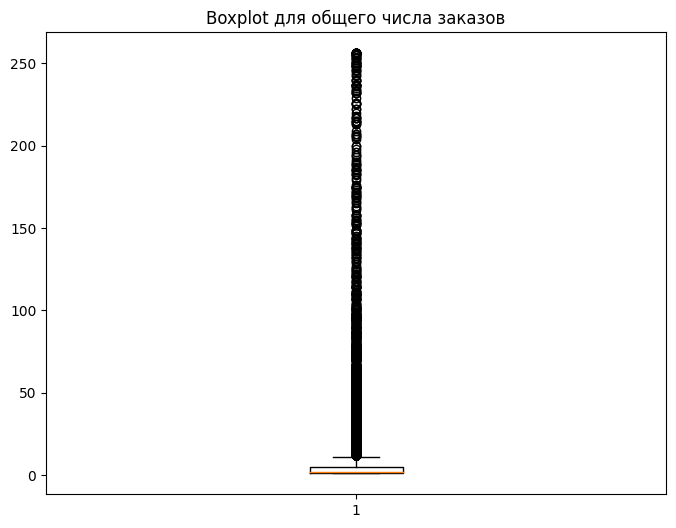

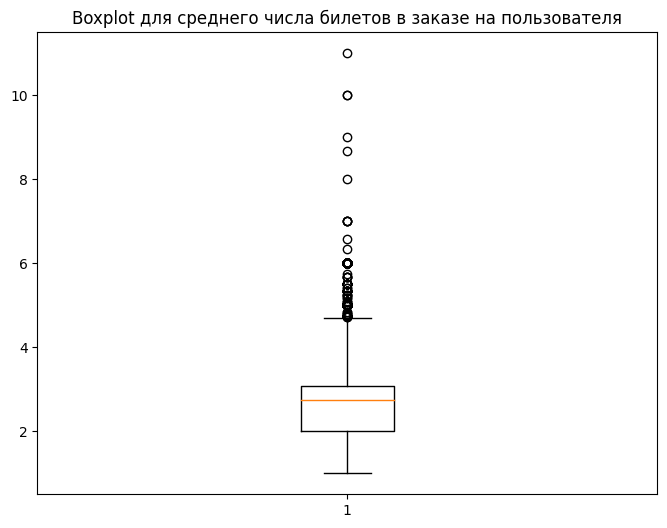

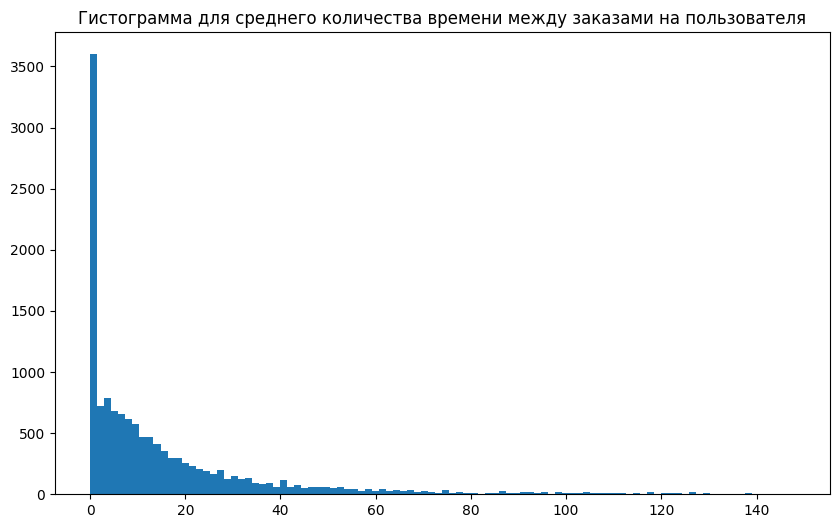

In [15]:
#статистика через боксплот по общему числу заказов, по среднему числу билетов в заказе, по среднему колву дней между заказами
plt.figure(figsize=(8, 6))
plt.boxplot(df1['total_orders'])
plt.title('Boxplot для общего числа заказов')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df1['avg_tickets_per_user'])
plt.title('Boxplot для среднего числа билетов в заказе на пользователя')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df1['avg_time_between_orders'], bins=100)
plt.title('Гистограмма для среднего количества времени между заказами на пользователя')
plt.show()

In [16]:
df1[['avg_time_between_orders', 'avg_tickets_per_user']].describe(include='all')

,avg_time_between_orders,avg_tickets_per_user
count,13511.000000,21838.000000
mean,15.847069,2.744062
std,22.304516,0.913083
min,0.000000,1.000000
25%,1.000000,2.000000
50%,8.000000,2.750000
75%,20.414286,3.080000
max,148.000000,11.000000


Заметны выбросы для общего колва заказов и среднего числа билетов в заказе, среднему времени между заказами. Для этих категорий введем ограничение в 95 перцентилей

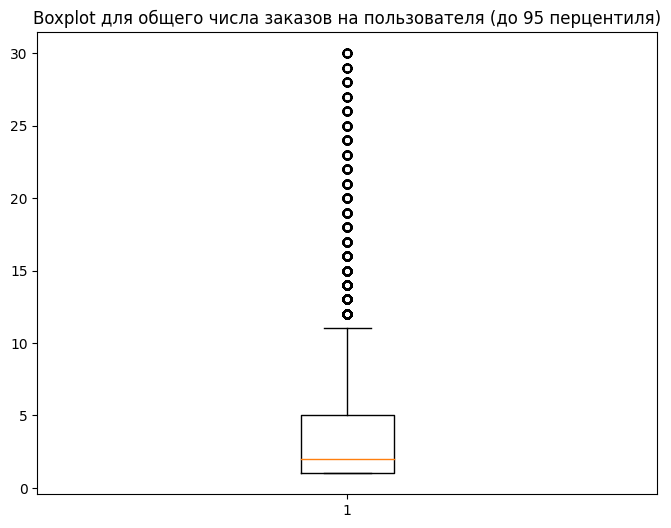

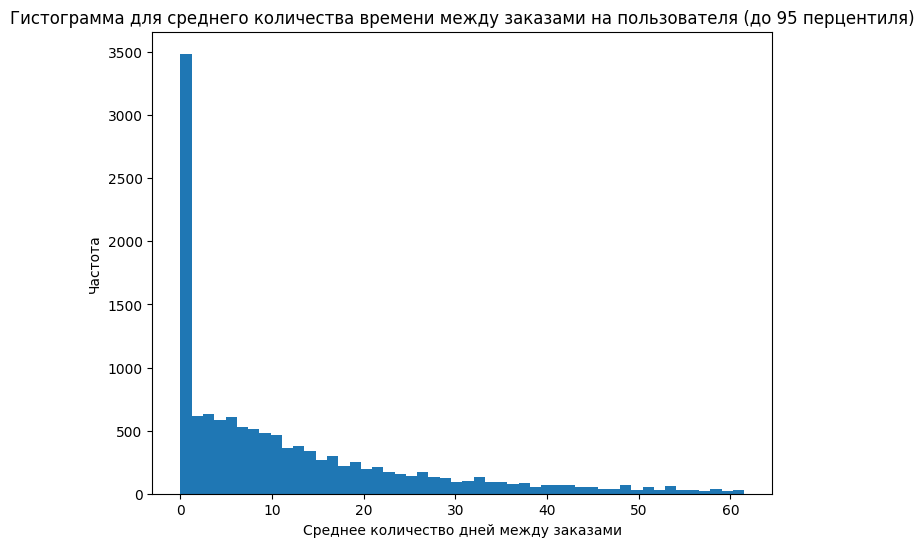

In [17]:
#исключение выбросов выше 95 перцентиля 
plt.figure(figsize=(8, 6))
p95 = df1["total_orders"].quantile(0.95)
plt.boxplot(df1.loc[df1["total_orders"] <= p95, "total_orders"])
plt.title("Boxplot для общего числа заказов на пользователя (до 95 перцентиля)")
plt.show()

plt.figure(figsize=(8, 6))
p95 = df1["avg_time_between_orders"].quantile(0.95)
plt.hist(df1.loc[df1["avg_time_between_orders"] <= p95, "avg_time_between_orders"], bins=50)
plt.title("Гистограмма для среднего количества времени между заказами на пользователя (до 95 перцентиля)")
plt.xlabel("Среднее количество дней между заказами")
plt.ylabel("Частота")
plt.show()

In [18]:
#вывод статистических показателей по обновленным столбцам
print((df1.loc[df1["total_orders"] <= p95, "total_orders"]).describe())
print('\n')
print((df1.loc[df1["avg_time_between_orders"] <= p95, "avg_time_between_orders"]).describe())

count    21335.000000
mean         5.067870
std          8.155238
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         61.000000
Name: total_orders, dtype: float64


count    12838.000000
mean        11.921267
std         13.659966
min          0.000000
25%          0.904271
50%          7.333333
75%         17.799999
max         61.500000
Name: avg_time_between_orders, dtype: float64


In [19]:
#считаем объем отфильтрованных данных
cols = ["total_orders", "avg_time_between_orders"]

for c in cols:
    p95 = df1[c].quantile(0.95)
    filtered = df1.shape[0] - df1[df1[c] <= p95].shape[0]
    print(c,', ' "отфильтровано:", filtered)

total_orders , отфильтровано: 1069
avg_time_between_orders , отфильтровано: 9000


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Создан новый дф с признаками, формирующими профиль пользователя. Изменен поход к формированию признаков в соответствии с комментариями
Вычислено общее значение уникальных пользователей, средняя выручка по одному заказу, среднему колву дней меж заказами
Колво аномальных значений велико, поэтому введены ограничения по 95 перцентилю
Все данные подкреплены визуализацией
В конце представлено колво отфильтрованных данных

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Решение по выбросам совсем не пояснено, на основе чего оно принято? С очисткой билетов и количества дней не соглашусь, разве значения выглядят аномально?

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Возвращаемость на второй и на пятый заказ можно посчитать через функцию `mean`, поскольку наши поля бинарные, как раз получим долю единичек. 


* Чтобы сильно не растягивать код на множество ячеек, схожие по целям и подходам шаги лучше выполнять одной ячейкой. Например, можно было бы объединить первичный подсчет статистик. Также статистические распределения по числовым признакам было бы лучше вывести разом одним `describe`. В параметрах можно расширить перечень перцентилей: `percentiles=[.25, .5, .75 ...]`.
    
    
* Было бы не лишним также проверить, насколько изменились показатели возвращаемости и средней выручки после фильтрации.

    
* Если выводим какие-то значения на печать, в том числе стоит печатать, что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять, а также форматировать сами значения. Для красоты и удобства дробные значения лучше округлять до знаков, которые могут представлять для нас интерес.

</div>


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Значения выглядят аномальными по следующей причине:
среднее время: медиана - 8, ср.взвеш - 16, максимальное 148
Билеты: согласен, убрал фильтрацию

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [20]:
#по типу первого мероприятия
print(df1.groupby('first_event_type').size() / df1.shape[0])
print('\n')
print(df1['first_event_type'].value_counts())

first_event_type
выставки    0.019095
другое      0.250252
концерты    0.441753
спорт       0.036679
стендап     0.051195
театр       0.196676
ёлки        0.004350
dtype: float64


first_event_type
концерты    9647
другое      5465
театр       4295
стендап     1118
спорт        801
выставки     417
ёлки          95
Name: count, dtype: int64


In [21]:
#по типу устройства с которого совершена первая покупка
print(df1.groupby('first_device').size() / df1.shape[0])
print('\n')
print(df1['first_device'].value_counts())

first_device
desktop    0.171627
mobile     0.828373
dtype: float64


first_device
mobile     18090
desktop     3748
Name: count, dtype: int64


In [22]:
#по региону проведения мероприятия
print(df1.groupby('first_region').size() / df1.shape[0])
print('\n')
print(df1['first_region'].value_counts())

first_region
Белоярская область      0.000916
Берестовский округ      0.001007
Берёзовская область     0.005266
Боровлянский край       0.004533
Верховинская область    0.000137
                          ...   
Шанырский регион        0.023125
Широковская область     0.056599
Яблоневская область     0.019049
Ягодиновская область    0.002931
Яснопольский округ      0.000046
Length: 81, dtype: float64


first_region
Каменевский регион          7160
Североярская область        3800
Широковская область         1236
Озернинский край             678
Малиновоярский округ         530
                            ... 
Светолесский край              2
Тихогорская область            2
Сосноводолинская область       1
Яснопольский округ             1
Верхозёрский край              1
Name: count, Length: 81, dtype: int64


In [23]:
#по билетному оператору при первом заказе
print(df1.groupby('first_ticket_operator').size() / df1.shape[0])
print('\n')
print(df1['first_ticket_operator'].value_counts())

first_ticket_operator
Crazy ticket!             0.002061
Show_ticket               0.007464
Билет по телефону         0.000275
Билеты без проблем        0.238300
Билеты в руки             0.118692
Быстробилет               0.007418
Быстрый кассир            0.002793
Весь в билетах            0.059758
Восьмёрка                 0.003938
Вперёд!                   0.000321
Выступления.ру            0.004396
Городской дом культуры    0.010028
Дом культуры              0.016393
За билетом!               0.009296
Зе Бест!                  0.000046
КарандашРУ                0.000733
Кино билет                0.000412
Край билетов              0.021018
Лимоны                    0.000092
Лови билет!               0.130552
Лучшие билеты             0.054309
Мир касс                  0.009708
Мой билет                 0.137055
Облачко                   0.100467
Прачечная                 0.026926
Радио ticket              0.001649
Реестр                    0.001832
Росбилет                  0.00183

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Была проведена группировка по раличным признакам, ее результаты показывают что пользователи распределены по сегментам неравномерно, есть сегменты с наиббольшим колвом пользователей
В разрезе первого типа ивента доминируют концерты и театры, по типу устройства - мобильные, по региону проведения - Каменевский регион, Североярская область
по билетному оператору: билеты без проблем, мой билет

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


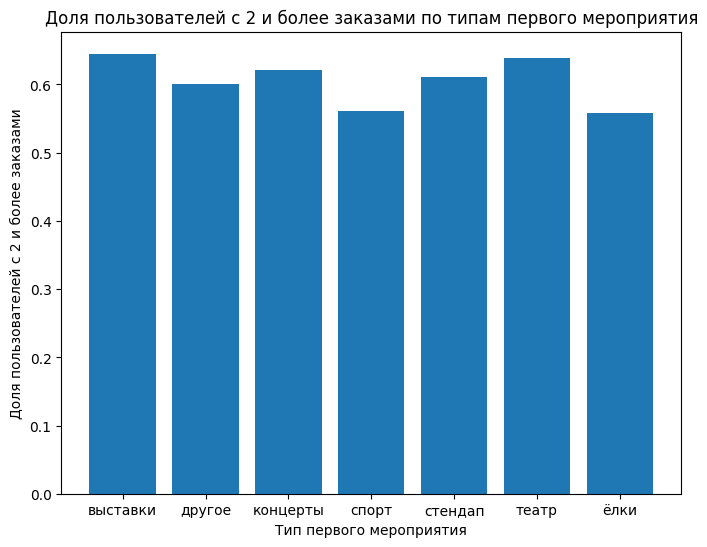

In [24]:
#доля совершивших 2 и более заказов для сегмента первого мероприятия
share = (
    df1.groupby("first_event_type")["is_two"].sum()
       / df1.groupby("first_event_type")["user_id"].nunique()
)

plt.figure(figsize=(8, 6))
plt.bar(share.index, share.values)
plt.xlabel("Тип первого мероприятия")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.title('Доля пользователей с 2 и более заказами по типам первого мероприятия')
plt.show()

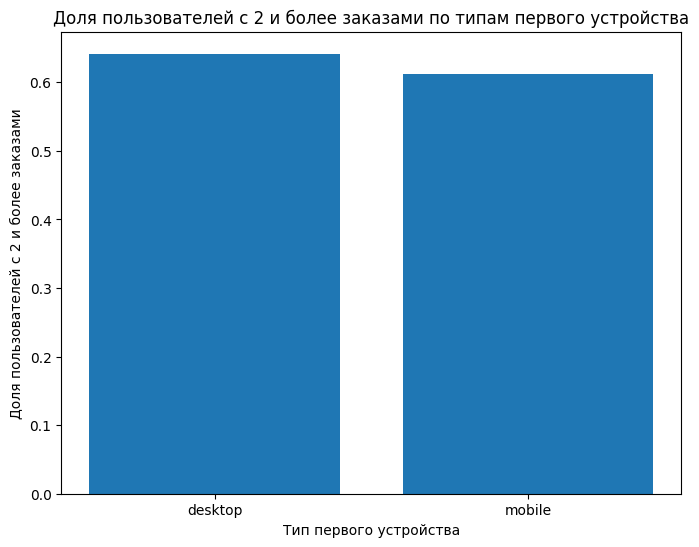

In [25]:
#доля совершивших 2 и более заказов для сегмента типа устройства
share = (
    df1.groupby("first_device")["is_two"].sum()
       / df1.groupby("first_device")["user_id"].nunique()
)

plt.figure(figsize=(8, 6))
plt.bar(share.index, share.values)
plt.xlabel("Тип первого устройства")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.title('Доля пользователей с 2 и более заказами по типам первого устройства')
plt.show()

first_region
Каменевский регион          4495
Североярская область        2436
Широковская область          801
Озернинский край             376
Шанырский регион             341
                            ... 
Тихогорская область            1
Теплоозёрский округ            1
Островогорский округ           1
Сосноводолинская область       0
Яснопольский округ             0
Name: is_two, Length: 81, dtype: int64 



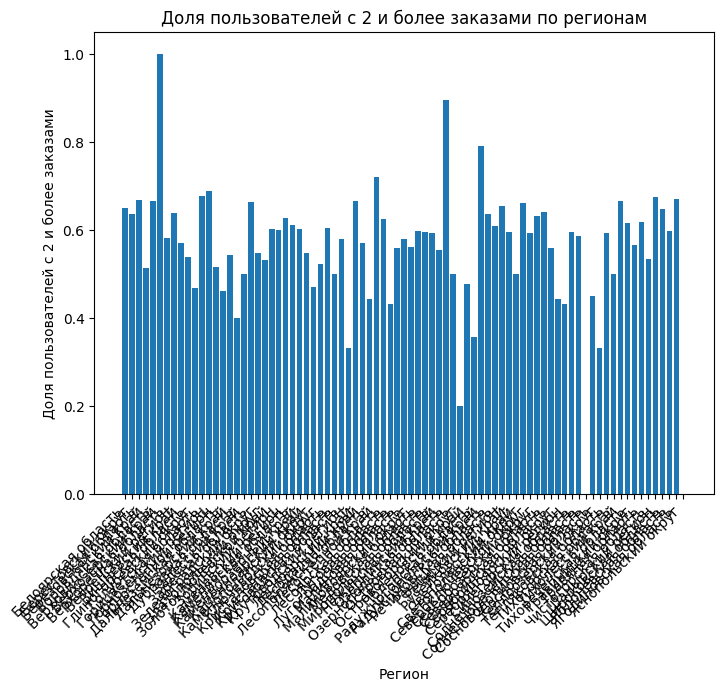

first_region
Верхозёрский край           1.000000
Озернопольская область      0.896552
Радужнопольский край        0.791667
Лесостепной край            0.721311
Горноземский регион         0.689655
                              ...   
Теплоозёрский округ         0.333333
Крутоводский регион         0.333333
Островогорский округ        0.200000
Сосноводолинская область    0.000000
Яснопольский округ          0.000000
Length: 81, dtype: float64


In [26]:
#доля совершивших 2 и более заказа для сегмента региона
share = (
    df1.groupby("first_region")["is_two"].sum()
       / df1.groupby("first_region")["user_id"].nunique()
)
result = (
    df1.groupby("first_region")["is_two"]
       .sum()
       .sort_values(ascending=False)
)
print(result, '\n')

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Регион")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.title('Доля пользователей с 2 и более заказами по регионам')
plt.xticks(rotation=45, ha="right")
plt.show()

print(share.sort_values(ascending=False))

first_ticket_operator
Билеты без проблем        3154
Мой билет                 1830
Лови билет!               1753
Билеты в руки             1639
Облачко                   1350
Весь в билетах             828
Лучшие билеты              729
Прачечная                  370
Край билетов               301
Дом культуры               232
Тебе билет!                189
Яблоко                     172
Мир касс                   137
Городской дом культуры     130
За билетом!                120
Show_ticket                108
Быстробилет                 96
Выступления.ру              60
Восьмёрка                   59
Быстрый кассир              52
Реестр                      34
Crazy ticket!               31
Росбилет                    26
Цвет и билет                16
Радио ticket                15
Телебилет                   12
КарандашРУ                   7
Шоу начинается!              6
Кино билет                   5
Билет по телефону            5
Вперёд!                      4
Лимоны           

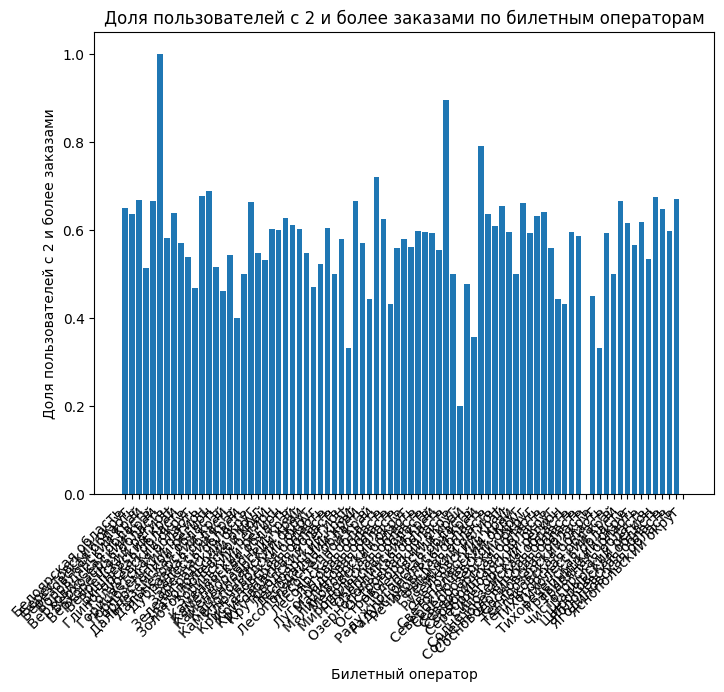

first_ticket_operator
Зе Бест!                  1.000000
Быстрый кассир            0.852459
Реестр                    0.850000
Билет по телефону         0.833333
Crazy ticket!             0.688889
Восьмёрка                 0.686047
Цвет и билет              0.666667
Show_ticket               0.662577
Край билетов              0.655773
Росбилет                  0.650000
Дом культуры              0.648045
Мир касс                  0.646226
Весь в билетах            0.634483
Билеты в руки             0.632330
Прачечная                 0.629252
Выступления.ру            0.625000
Облачко                   0.615314
Лови билет!               0.614872
Лучшие билеты             0.614671
Мой билет                 0.611427
Тебе билет!               0.607717
Билеты без проблем        0.606072
Городской дом культуры    0.593607
Быстробилет               0.592593
За билетом!               0.591133
Вперёд!                   0.571429
Кино билет                0.555556
Яблоко                    0.53750

In [27]:
#доля совершивших 2 и более заказа для сегмента билетного оператора
share1 = (
    df1.groupby("first_ticket_operator")["is_two"].sum()
       / df1.groupby("first_ticket_operator")["user_id"].nunique()
)
res = (
    df1.groupby("first_ticket_operator")["is_two"]
    .sum()
    .sort_values(ascending=False)
)
print(res, '\n')

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Билетный оператор")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.title('Доля пользователей с 2 и более заказами по билетным операторам')
plt.xticks(rotation=45, ha="right")
plt.show()

print(share1.sort_values(ascending=False))

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Проведены вычисления по доле пользователей, совершивших 2 и более заказа. Результаты по значимым выборкам показывают:
регионы: Североярская (выборка - 2436 пользователей, процент с 2+ заказами: 64), Широковская область (801 пользователей, 2+ заказа: 64%)
билетный оператор: Мой билет (Выборка - 1830 польз, процент с 2+ заказми: 61), Облачко (выборка - 1350, процент с 2+: 61)
тип устройства: кратно превалирует десктоп,
тип первого мероприятия: выставки и театр

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [28]:
#Гипотеза 1
sport_users = df1.loc[df1["first_event_type"].eq("спорт"), "user_id"].drop_duplicates()
sport_repeat_users = df1.loc[
    df1["first_event_type"].eq("спорт") & df1["is_two"].fillna(False),
    "user_id"
].drop_duplicates()
sport_rate = sport_repeat_users.nunique() / sport_users.nunique()

concert_users = df1.loc[df1["first_event_type"].eq("концерты"), "user_id"].drop_duplicates()
concert_repeat_users = df1.loc[
    df1["first_event_type"].eq("концерты") & df1["is_two"].fillna(False),
    "user_id"
].drop_duplicates()
concert_rate = concert_repeat_users.nunique() / concert_users.nunique()

print(sport_rate > concert_rate)

False


In [29]:
#Гипотеза 2
top_regions = df1['first_region'].value_counts().head(10)

region_users = df1.loc[df1["first_region"].isin(top_regions.index), "user_id"].drop_duplicates()
region_repeat_users = df1.loc[
    (df1["first_region"].isin(top_regions.index)) & (df1["is_two"].fillna(False)),
    "user_id"
].drop_duplicates()
region_users1 = df1.loc[~df1["first_region"].isin(top_regions.index), "user_id"].drop_duplicates()
region_repeat_users1 = df1.loc[
    (~df1["first_region"].isin(top_regions.index)) & (df1["is_two"].fillna(False)),
    "user_id"
].drop_duplicates()

region_rate = region_repeat_users.nunique() > region_repeat_users1.nunique()

print(region_rate)

True


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Проверка гипотезы 1 показала, что пользователи, которые совершили свой первый заказ на спортивное мероприятие, реже возвращаются на Афишу, чем пользователи, совершившие первый заказ на концерты следовательно гипотеза не подтверждена. Проверка гипотезы 2 показала, что в регионах, в которых посещается больше всего мероприятий, чаще совершаются повторные заказы, чем в менее посещаемых регионах, следовательно гипотеза подтверждена

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> 
    
* Графики должны содержать заголовки, чтобы в любой момент (при пролистывании проекта без чтения кода, в презентации, в рабочем чате и т.д.) картинка имела при себе контекст, позволяющий ее понять.
    
    
* Вывод по второй гипотезе нельзя назвать аргументированным, ты ведь посмотрел только возвращаемость у топа регионов. При этом сравнивать с общей возвращаемостью в остальных тоже будет не совсем корректно. Важно учитывать размерность групп при сравнении долей! В менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Например, если бы у нас в группу с остальными регионами попало только два региона с одним пользователем, в одном вернулось 100%, в другом 0%, среднее 50%, показательно ли это? Чтобы сделать более осознанный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
    Но вообще, чтобы наверняка убедиться в том, что возвращаемость в непопулярных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе, там есть довольно много нюансов.   

</div>    

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Сейчас ты выполняешь большое количество однотипных действий. Чтобы немного облегчить код и уменьшить влияние человеческого фактора, стоит создать какую-нибудь пользовательскую функцию или зациклить выполнение определенного шаблона действий. Можно даже сразу объединить расчеты для первой и второй подзадачи, а потом уже переходить к визуализации и анализу. 
    
    
* Доли всегда анализируются только в совокупности с количеством, которое характеризует его устойчивость, поэтому их стоит держать рядом в одной таблице, а не порознь.
    
    
* График по билетным операторам сейчас совсем не читаем, стоит отобразить только топ, все остальное для графика можно объединить в категорию "прочее".


* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.


* Также было бы неплохо добавить на графики линию общей возвращаемости по выборке, чтобы было удобно сравнивать, какие сегменты и насколько отличаются от общего показателя по выборке. Это можно сделать с помощью `plt.axhline` (горизонтальная) или `plt.axvline`(вертикальная), потребуется также добавить легенду, чтобы обозначить, что есть что. Но обращаю внимание, что ввиду различия размерности групп это должна быть возвращаемость в выборке, а не среднее между возвращаемостями по группам.
    
 
* В выводах по первым двум частям важно также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей.


* Каков итоговый вывод по анализу сегментов? Какие инсайты мы получили?
    
    
* Напоминаю про моменты, поясненные ранее: оформление выводимых на печать значений.

    
</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Поправил заголовки на графиках и пересчет значения для гипотезы2

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


count    8365.000000
mean      545.811314
std       519.346667
min         0.000000
25%       133.090000
50%       378.870000
75%       830.820000
max      2628.421739
Name: avg_revenue_per_user, dtype: float64 

count    13473.000000
mean       544.549443
std        366.596977
min          0.000000
25%        274.876000
50%        498.054444
75%        739.785000
max       2628.421739
Name: avg_revenue_per_user, dtype: float64 



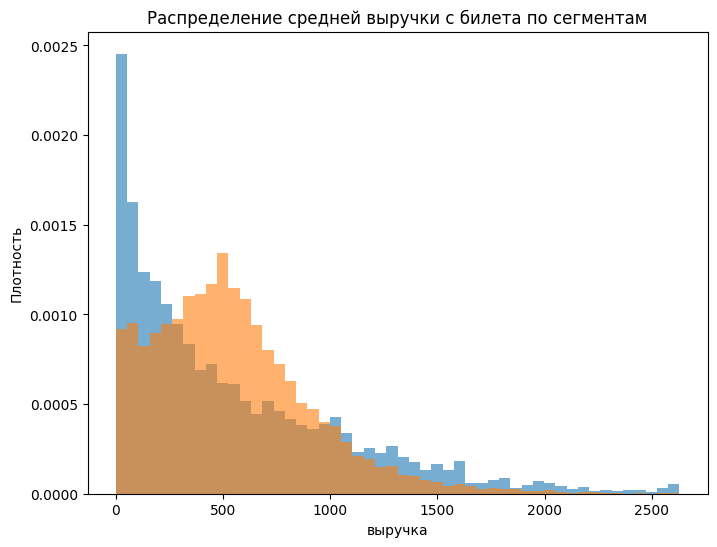

In [30]:
# средняя выручка с билета для пользователя, совершившего 1 заказ
avg_revenue_rub1 = df1.loc[df1["total_orders"] == 1, "avg_revenue_per_user"]
print(avg_revenue_rub1.describe(), "\n")

# средняя выручка с билета для пользователя, совершившего 2+ заказов
avg_revenue_rub2 = df1.loc[df1["is_two"], "avg_revenue_per_user"]
print(avg_revenue_rub2.describe(), "\n")

plt.figure(figsize=(8, 6))
plt.hist(avg_revenue_rub1, bins=50, alpha=0.6, density=True)
plt.hist(avg_revenue_rub2, bins=50, alpha=0.6, density=True)
plt.title("Распределение средней выручки с билета по сегментам")
plt.xlabel("выручка")
plt.ylabel("Плотность")
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Пользователи, совершившие 1 заказ имеют медиану по заказу равную 378, пользователи совершившие 2+ заказа имеют медиану равную 498. Распределение пользователей с 2+ заказами ближе к нормальному, чем у пользователей с 1 заказом. Выбросы по стоимости одного заказа встречаются чаще у пользователей, совершивших 1 заказ. 
Различие между группами заключается в средней стоиомсти заказа в рублях: пользователи с 2+ заказами имеют большую медиану по заказу

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


472.52666666666664 

513.7845419103314 



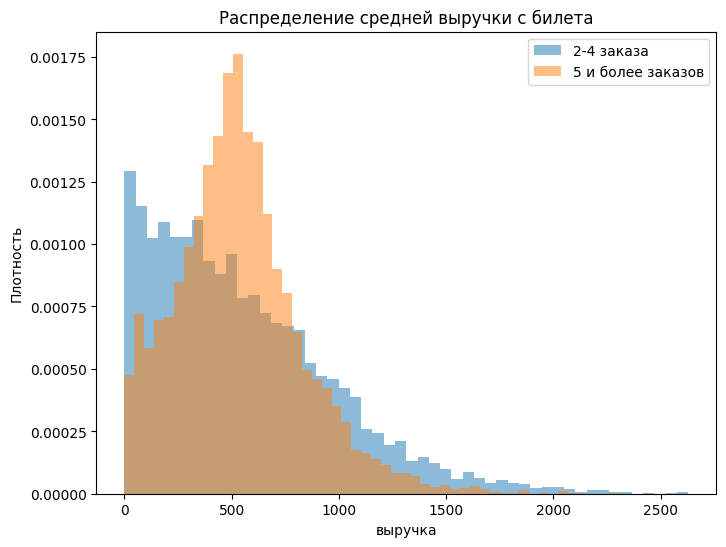

In [31]:
#сравнение распределения по средней выручке для категорицй пользователей совершивших 2-4 заказа и более 5 заказов
avg_revenue_24 = df1.loc[df1['total_orders'].between(2,4), "avg_revenue_per_user"]
avg_revenue_5 = df1.loc[df1["is_five"], "avg_revenue_per_user"]
print(avg_revenue_24.median(), "\n")
print(avg_revenue_5.median(), "\n")
#визуализируем
plt.figure(figsize=(8, 6))
plt.hist(avg_revenue_24, bins=50, alpha=0.5, density=True, label="2-4 заказа")
plt.hist(avg_revenue_5, bins=50, alpha=0.5, density=True, label="5 и более заказов")
plt.title("Распределение средней выручки с билета")
plt.xlabel("выручка")
plt.ylabel("Плотность")
plt.legend()
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
гистограмма распредления по категориям пользователей представлена на визуализации выше. Средние значения стоимости заказа для двух сегментов 2-4 заказа и 5 и более заказов составляет 472 и 513 соответственно, что может указывать на взаимосвязь: количества заказов и средней стоиомсти одного заказа 

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`).
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> В первой части графики тоже требуется наложить друг на друга, иначе мы едва ли можем сопоставлять распределения.
  
</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>  
    
* Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого.
    
    
* На график также стоит добавить сетку, чтобы лучше в нем ориентироваться.


* Обрати внимание, что мы анализируем не стоимость заказа, а выручку, которую с него получил наш билетный агрегатор. Также во втором случае ты смотришь не среднее, а мединанное значение, это совершенно разные понятия, которые могут сильно отличаться при ненормальных распределениях, их важно не путать, чтобы никого не вводить в заблуждение.


* Выводы очень поверхностные. Сейчас ты просто пересказываешь результаты, но это не является аналитикой. Анализ заключается в интерпретации полученных результатов, вытаскивании инсайтов, составлении какого-то представления/характеристики на основе полученных данных, пояснении того, что для нас это значит, почему могло получиться именно так. Именно эти суждения для нас ценны, цифры являются лишь подкреплением. В данном случае в выводах стоит выделить сегменты концентрации - резюмировать информацию с графиков в более понятные лаконичные диапазоны, при этом, в том числе обратить внимание на хвосты. Затем попробовать подумать, что для нас могут значить результаты, почему они могли получиться именно такими, что это говорит о клиентах, об их стабильности? Это может быть полезно в плане развития стратегий по работе с той или иной категорией пользователей.


* Каков итоговый вывод по анализу выручки? Какие инсайты мы получили?
    
    
* Напоминаю про моменты, поясненные ранее: оформление выводимых на печать значений.
    
</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Доработал в части графиков

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

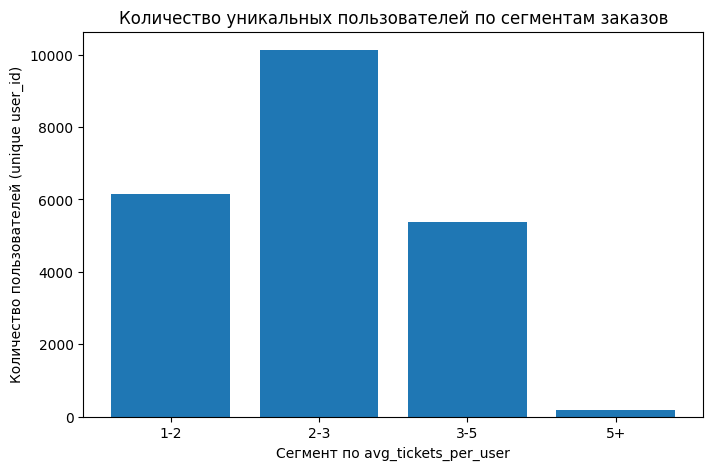

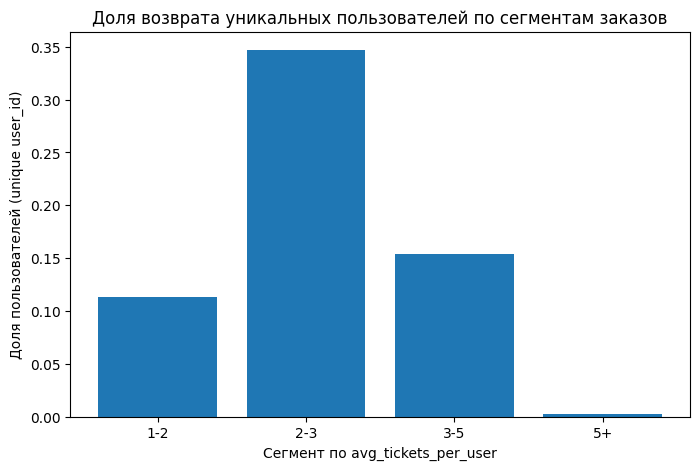

In [38]:
#изучение распределения пользователей по среднему колву билетов в заказе
mask_rep = df1["is_two"]
s = df1["avg_tickets_per_user"]

users_12 = df1.loc[s.between(1, 2, inclusive="both"), "user_id"].nunique()
users_23 = df1.loc[(s > 2) & (s <= 3), "user_id"].nunique()
users_35 = df1.loc[(s > 3) & (s <= 5), "user_id"].nunique()
users_5p = df1.loc[(s > 5), "user_id"].nunique()

users_12_rate = df1.loc[mask_rep & s.between(1, 2, inclusive="both"), "user_id"].nunique() / df1["user_id"].nunique() 
users_23_rate = df1.loc[mask_rep & (s > 2) & (s <= 3), "user_id"].nunique() / df1["user_id"].nunique() 
users_35_rate = df1.loc[mask_rep & (s > 3) & (s <= 5), "user_id"].nunique() / df1["user_id"].nunique() 
users_5p_rate = df1.loc[mask_rep & (s > 5), "user_id"].nunique() / df1["user_id"].nunique() 

labels = ["1-2", "2-3", "3-5", "5+"]
values = [users_12, users_23, users_35, users_5p]
vals = [users_12_rate, users_23_rate, users_35_rate, users_5p_rate]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title("Количество уникальных пользователей по сегментам заказов")
plt.xlabel("Сегмент по avg_tickets_per_user")
plt.ylabel("Количество пользователей (unique user_id)")
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(labels, vals)
plt.title("Доля возврата уникальных пользователей по сегментам заказов")
plt.xlabel("Сегмент по avg_tickets_per_user")
plt.ylabel("Доля пользователей (unique user_id)")
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
На барплоте выше представлено распределение пользователей по сегментам заказов в количественном и относительном форматах. Распредление не равномерно: доминируют пользователи на интервале 2-3.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

    
<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> Выведение долей строкой без подписи, что кому принадлежит, это не окей. Сейчас мы анализируем возвращаемость в сегментах, а не чисто их объем. Мы хотим проверить, как раличные категории пользователей (одиночки, пары, большие компании, корпоративные закупки) ведут себя в этом плане. Необходимо развить мысль в эту сторону.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b>

* Для сегментации данных есть довольно удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Можно задать границы интервалов и последовательный список наименований сегментов и они автоматически сформируются. Необходимо только правильно настроить параметр `right`, который по умолчанию имеет значение `True`, и параметр `include_lowest`, по умолчанию имеющий значение `False`, чтобы у нас включались и исключались нужные нам границы интервала.


* Сейчас у тебя первый сегмент включает обе границы, а последний не включает их вовсе. Сейчас по всему диапазону у нас есть фиксированное ограничение снизу, и нет ограничения сверху, по такой же логике стоит формировать и сегменты - включать левую границу и исключать правую.


* Выводы, опять же, совсем не интересные. Здесь необходимо предположить, что за типы клиентов попали в каждую из групп, почему получились именно такие результаты по возвращаемости? Чем данная информация интересна бизнесу? Опять же, это может быть полезно в плане развития стратегий по рабое с разными типами пользователей.

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Поправил вывод возвращаемости пользователей в разрезе билетов. Визуализировал относительную величину. Большую возвращаемость демонстрируют пользователи с 2-3 заказами

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


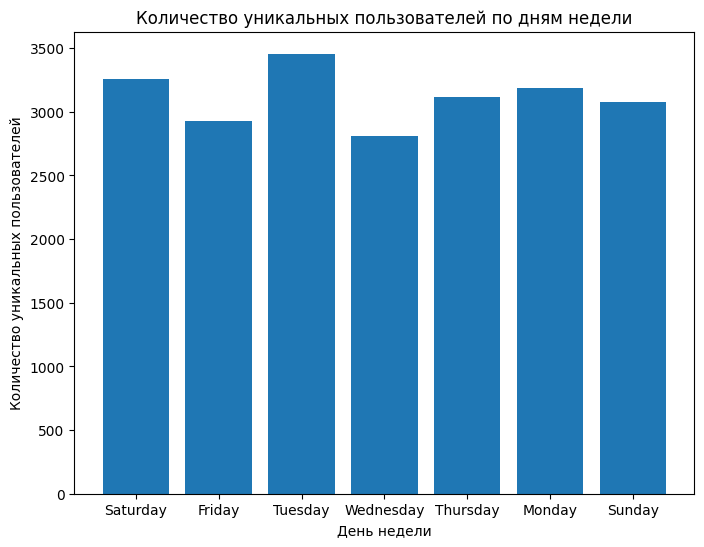

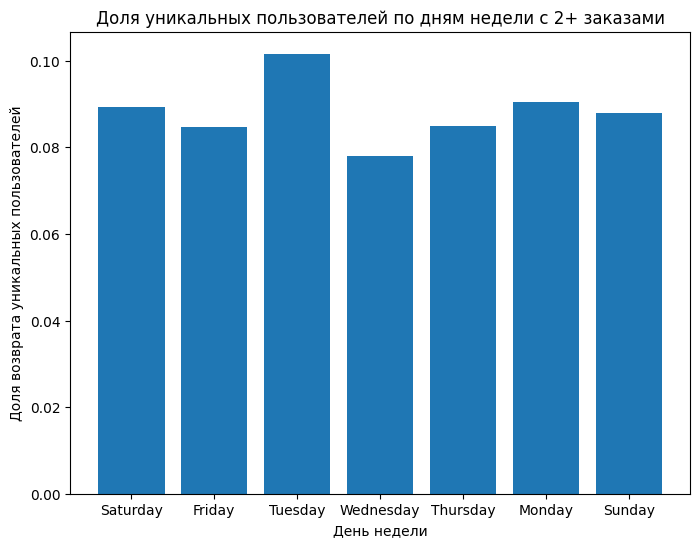

In [39]:
#Выделение дня недели из первого заказа пользователя
df1["first_order"] = pd.to_datetime(df1["first_order"])
df1["weekday"] = df1["first_order"].dt.day_name()

rep_orders = df1.groupby('weekday')['user_id'].nunique()
rep_orders_share = df1.loc[df1['is_two']].groupby('weekday')['user_id'].nunique() / df1['user_id'].nunique()

labels = ["Saturday", "Friday", "Tuesday", "Wednesday", "Thursday", "Monday", "Sunday"]

plt.figure(figsize=(8, 6))
plt.bar(labels, rep_orders)
plt.title("Количество уникальных пользователей по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество уникальных пользователей")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(labels, rep_orders_share)
plt.title("Доля уникальных пользователей по дням недели с 2+ заказами")
plt.xlabel("День недели")
plt.ylabel("Доля возврата уникальных пользователей")
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
колво пользователей с 2 и более заказов отражено на барплоте. Присутствует взаимосвязь возврата клиента и первого дня совершения заказа: например число вернувшихся пользователей совершивших заказ в субботу превышает число вернувшихся пользователей совершивших заказ в воскресенье примерно на 500 единиц, что следует из барплота.   

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Здесь мы, опять же, анализируем возвращаемость, а не количественную представленность. Данный анализ может помочь нам понять, в какие дни лучше делать рассылки с персональными предложениями, акциями, чтобы они оказывали более качественный эффект на клиентов.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации 💡:</b>

* Для удобства на график можно добавить линию общей возвращаемости.


* Для удобства анализа столбики на графике стоит расположить в логическом порядке.


* В выводах необходимо предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить? Чем отличаются пользователи, формирующие заказ в тот или иной день?

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Переделал барплот, визуализировал долю пользователей с возвращаемостью, поправил визуализацию для количества пользователей. Наибольшую возвращаемость демонстрируют пользователи, сделавшие заказ во вторник

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


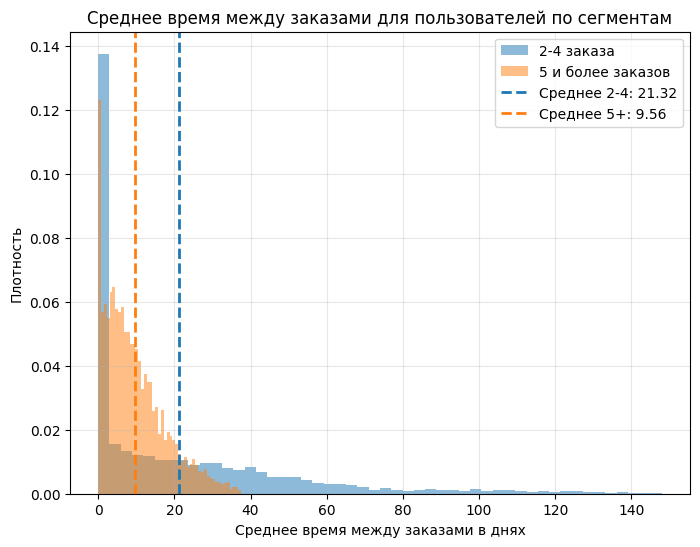

In [34]:
#среднее время между заказами для пользователей по сегментам по колву заказов
users_24 = df1.loc[(df1["is_two"]) & (df1["total_orders"] <= 4)].groupby('user_id')['avg_time_between_orders'].mean()
users_5 = df1.loc[df1["is_five"]].groupby('user_id')['avg_time_between_orders'].mean()

plt.figure(figsize=(8, 6))

plt.hist(users_24, bins=50, alpha=0.5, density=True, label="2-4 заказа")
plt.hist(users_5, bins=50, alpha=0.5, density=True, label="5 и более заказов")

m24 = users_24.mean()
m5 = users_5.mean()
plt.axvline(m24, color='C0', linestyle='--', linewidth=2, label=f'Среднее 2-4: {m24:.2f}')
plt.axvline(m5, color='C1', linestyle='--', linewidth=2, label=f'Среднее 5+: {m5:.2f}')
plt.title("Среднее время между заказами для пользователей по сегментам")
plt.xlabel("Среднее время между заказами в днях")
plt.ylabel("Плотность")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Результаты выше демонстрируют что группа пользователей совершившая 5 и более заказов имеет вдвое меньшее среднее время между заказами чем группа пользователей с 2-4 заказами. Из этого следует что меньшее время между заказами повышает вероятность повторного заказа

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> 

* Важно иметь в виду, что среднее значение как раз довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основная масса значений будет гораздо ниже. Поэтому здесь удобнее было бы построить гистограммы (как мы это делали при сравнении выручки), чтобы можно было полноценно сравнить их характер распределения.


* Вывод довольно банален. Логично, что на ограниченном промежутке времени у клиента с большим количеством заказов интервалы будут меньше. Поэтому здесь стоит делать обратный ход - подумать, как по интервалу времени после очередного заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора подключать стратегии для вовлечения в новый заказ.
 
</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации 💡:</b>

* Особенно важно в данном случае настроить единый размер бинов для гистограмм. Иначе из-за различий в диапазонах характер графиков уж слишком отличается. Также стоит добавить сетку, чтобы удобнее было ориентироваться на графике.
    
    
* Напоминаю про моменты, поясненные ранее: оформление выводимых на печать значений.
   
</div>


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Добавил гистограмму для возможности просмотра распределения, отметил сетку.
Предположу, что данные выводы помогут сформировать следующее: по прошествии среднего времени заказа для сегмента пользователей по заказам стратегии для вовлечения в новый заказ  

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [35]:
correlation_matrix = df1[['first_device', 'first_region', 'first_ticket_operator', 
                          'first_event_type', 'total_orders', 'avg_revenue_per_user', 
                          'avg_tickets_per_user', 'avg_time_between_orders']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной total_orders')
correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

interval columns not set, guessing: ['total_orders', 'avg_revenue_per_user', 'avg_tickets_per_user', 'avg_time_between_orders']
Корреляционная матрица с коэффициентом phi_k для переменной total_orders


,total_orders
avg_time_between_orders,0.223169
avg_tickets_per_user,0.212510
avg_revenue_per_user,0.204064
first_region,0.086952
first_ticket_operator,0.085400
first_device,0.036173
first_event_type,0.010765


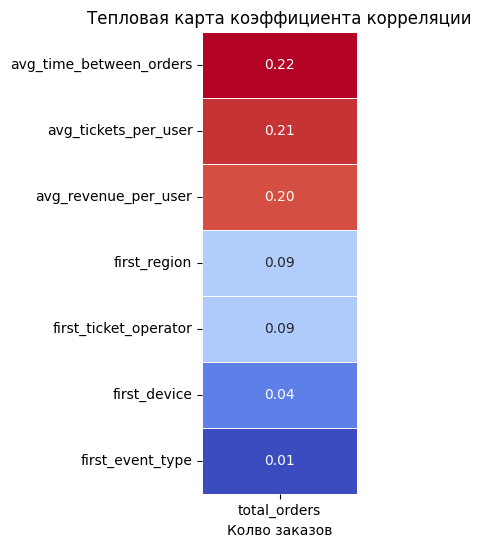

In [36]:
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака total_orders с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
sb.heatmap(data_heatmap,
            annot=True,
            fmt='.2f', 
            cmap='coolwarm',
            linewidths=0.5, 
            cbar=False 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента корреляции')
plt.xlabel('Колво заказов')

# Выводим график
plt.show()

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
На основании данных полученных в результате плоттинга тепловой карты можно заключить что наибольшую взаимосвязь со средним временем между заказами, средним колвом билетов на пользователя, средней выручкой на пользователя. Значения составляют соответственно 0.22, 0.21 и 0.2.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>


<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Phik корреляция работает в том числе с категориями. В отношении категорий разве определена линейность? Нет, значит Phik не оценивает линейную взаимосвязь.
    
Также Phik корреляция всегда имеет положительные значения. Данная корреляция не говорит о направленности взаимосвязи, только о ее силе. Поэтому некорректно строить суждения, что чем больше что-то одно, тем больше/меньше что-то другое. О направленности мы можем лишь предполагать, полагаясь на логику и здравый смысл, либо же подкреплять суждения результатами предыдущих шагов. Если ты хочешь добавить про направленность, то важно оставить пояснение, на основе чего мы это говорим.

</div> 
   
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* В анализ имеет смысл включить день недели.


* Обрати внимание, что Phik бинаризует числовые признаки, поэтому их стоит задать в параметре `interval_cols`, чтобы ему не приходилось их разыскивать. 
    
    
* При этом бинаризует он скорее из расчета имеющегося диапазона, а распределение количества заказов у нас крайне асимметричной. Поэтому имеет смысл создать сегменты по количеству заказов самостоятельно, чтобы они были более сбалансированы по составу, и уже с ними проверять корреляции.


*  В выводах было бы неплохо провести параллель с нашими предыдущими шагами анализа. Прокомментировать, почему высокая корреляция получается с одними признаками и низкая с другими. Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет?

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Убрал фразу про линейную зависимость, прочитал что phik учитывает в том числе нелинейную и немонотонную взаимосвязь.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Подготовка и предобработка данных
Полученные данные содержали пропуски только в столбце days_since_prev, не содержали дубликатов и были приведены к меньшей размерности для экономии памяти. Был создан отдельный столбец с выручкой в российских рублях для корректной дальнейшей работы. Также во время предобработки была проведена фильтрация выбросов данных для упрощения дальнейшего статистического анализа. После этого перешли к созданию профиля пользователя


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Количество уникальных пользователей в выборке составляет - 21838. 
Список наиболее весомых признаков связанных с возвратом пользователя на платформу: тип первого мероприятия, регион проведения мероприятия, билетный оператор при первом заказе, тип устройства при совершении заказа.
Результаты анализа показали, что концерты и театр - типы мероприятия обеспечивший наибольшую долю повторных покупок, пользователи совершавшие заказы с компьютера - чаще совершают повторный заказ, Билеты без проблем, мой билет - билетные операторы обеспечившие наибольшую долю повторных покупок, Североярская и Широковская область - два наиболее популярных места совершения заказа с поправкой на численность выборки, обеспечивших повторные продажи
Анализ взаимосвязи выручки и повторного заказа показал следующее: пользователи с 2+ заказами имеют большую медиану по заказу, чем пользователи с одним заказом. Взаимосвязь среднего количества билетов в заказе показывает что с наибольшей частотой повторную покупку совершают пользователи с 2-3 билетами в заказе
Наибольшее число пользователей совершивших 2 и более покупок совершили свой первый заказ в субботу и пятницу. Анализ влияния среднего интервала между заказами показал что пользователи с 5+ заказами имеют вдвое меньший интервал времени между заказами, чем пользователи с 2-4 заказами
Проведенный корреляционный анализ показал что наибольшей взаимосвязью с числом покупок обладают следующие признаки: среднее время между заказами, среднее колво билетов на пользователя, средняя выручка на пользователя

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Из проведенного корреляционного анализа следует, что среднее время между заказами - наиболее важная компонента совокупного количества заказов пользователей следовательно Заказчику стоит сконцентрировать свои усилия на этой компоненте

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Итоговые выводы совсем не содержательны. Отмечено, что наблюдается, но из этого не выделено никаких полезных инсайтов. Это большое упущение, ведь исследовательский анализ именно в этом и заключался. Стоит обратить внимание на рекомендации по выводам, которые я оставляла для каждой из задачек.
    

    
* Завершать проект стоит рекомендациями, основанными на выявленных закономерностях. Что можно реализовать с точки зрения маркетинговых стратегий подогревания и удержания?
    

</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Ссылка на проект: https://github.com/yuskonst/praktikum_yus**

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Сейчас работу с Git сделали необязательной, но отмечу довольно критичные моменты.

* <span style="color:Red;">В репозитории не должно быть опубликовано данных и ключей для доступа к ним (как в `.env`, так и в самой тетрадке, **в том числе в тексте задания**), это считается засекреченной информацией. Можно оставить лишь `env_exaple`, чтобы читатели, желающие запустить код, вставили туда свои собственные ключи. Сам `.env необходимо отправить в игнорирование.</span>


* Сейчас у тебя выложена незапущенная тетрадка, в таком виде она бесполезна, поскольку читатель не сможет ее запустить самостоятельно - у него нет доступа к данным.


* Можно заполнить `readme` полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>


<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Поправил ошибки в работе с Git

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> <span style="color:Red;">Сейчас у тебя остались ключи в самой тетрадке при создании подключения.</span>

</div>

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Убрал ключи из тетради

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Константин, спасибо за твой проект! Основа неплохая! Однако предстоит еще немало работы. Кратко пройдусь по впечатлениям. 
    
**Полнота:** 
    
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие явных, неявных, неполных дубликатов и невалидных значений - одни из важных этапов предобработки по умолчанию.</span>
    
* <span style="color:Red;">Каждое принимаемое решение требует пояснений. Каждый шаг требует выводов относительно его результатов.</span>
    
**Корректность:** 

* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпрометировать явки и пароли. Не забываем опубликовать файл в Git.</span>
* <span style="color:Red;">Необходимо скорректировать конвертацию выручки - правильно учитывать наименования валют.</span>
* <span style="color:Red;">Таблица с профилями должна содержать по одной записи о каждом клиенте. Это ключевой момент.</span>
* <span style="color:Red;">Необходимо скорректировать определение характеристик первого региона. Минимизация здесь не помощник.</span>
* To be continued...

**Аналитическая проницательность:** пока не понятно, посмотрим в следующий раз.
    
**Эффективность кода:** по этому критерию пока не все окей - как минимум сейчас стоит пересмотреть реализацию создания таблицв с профилями.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. В этом плане пока тоже не ахти (смотри по ходу работы).

    
**Желаю удачи и жду твой проект на повторное ревью!** 😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />